<a href="https://colab.research.google.com/github/10erick-cpu/Entregas_TP/blob/main/TP2/TP2_Casos_Covid_Bahia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico 2 - Casos_Camas_COVID_Bahía Blanca**

### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Ing. Manlio Miguel Massiris


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Librerias Usadas**

In [2]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from google.colab import drive
import matplotlib.dates as mdates
from scipy import stats
from statsmodels.distributions.mixture_rvs import mixture_rvs
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import matplotlib.dates as mdates



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Ejercicio I**

### **Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos**

###**Hay variables que puedan ser razonablemente consideradas normales?**

###**Hay variables que tienen un comportamiento sospechoso?**

# **Dataset a utilizar / Camas_COVID Bahía Blanca**

In [3]:
# file_ = ('/content/camas_covid_bahia.csv') # Otra manera es descargar desde raw y guardarlo como csv.

file = ('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')

# **Información del Dataset 1**

In [4]:
data = pd.read_csv(file)

# df = data.drop(['observaciones'], axis=1) # Elimina columna sin datos
# df = df.drop(columns=['observaciones'])

# Eliminamos filas con observaciones

df= data[data['observaciones'].isnull()]

df
# df.head(10)


,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


# **Obtenemos los Párametros Estadísticos**

In [5]:
df.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,69.075000,847.762500,367.050000,42.850000,164.400000,20.100000,35.037500,33.087500,31.962500,7.800000,142.262500,25.525000,39.025000,8.237500,144.000000,5.037500,3.700000
std,41.837169,1.314416,37.164329,4.392456,4.615878,6.186142,21.523284,15.129143,0.248731,6.713674,0.442769,7.175865,27.739281,7.654309,4.611488,4.419301,0.461149
min,1.000000,844.000000,294.000000,34.000000,155.000000,10.000000,10.000000,15.000000,31.000000,1.000000,142.000000,14.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,29.750000,848.000000,340.500000,40.000000,163.000000,16.000000,20.750000,22.000000,32.000000,3.000000,142.000000,21.000000,0.000000,0.000000,137.000000,2.750000,3.000000
50%,86.500000,848.000000,369.000000,43.000000,163.000000,18.500000,25.000000,26.500000,32.000000,4.000000,142.000000,25.000000,52.500000,7.000000,147.000000,4.000000,4.000000
75%,106.250000,848.000000,391.500000,46.000000,164.750000,23.000000,51.250000,41.500000,32.000000,12.250000,143.000000,28.000000,61.250000,13.250000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


#**Análisis Estadístico**

##**Histograma -  Curva de Densidad - Quantile-Quantile Normal (QQnorm)**

Procedemos a analizar la distribución que presentan los datos, para ello realizaremos las siguientes gráficas:

•	**Histograma**

•	**Curva de densidad** 

•	**Quantile – Quantile normal (QQnormal**) ->  Este gráfico compara los cuantiles de nuestros datos (Sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar , N(0,1) . Si la distribución de nuestros datos es normal, el grafico será aproximadamente una línea recta.


# **Datos - Variables Utilizadas**

### **Camas_Ocupadas_Hospitales**

### **Camas_Sospechosos_COVID**

### **Camas_Confirmados_COVID**

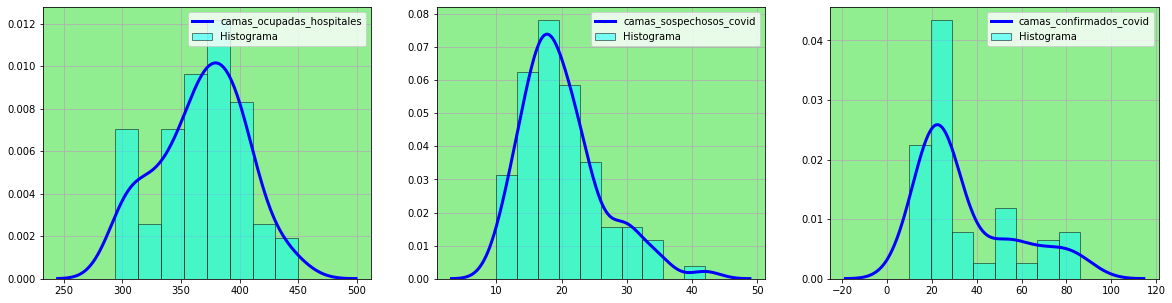

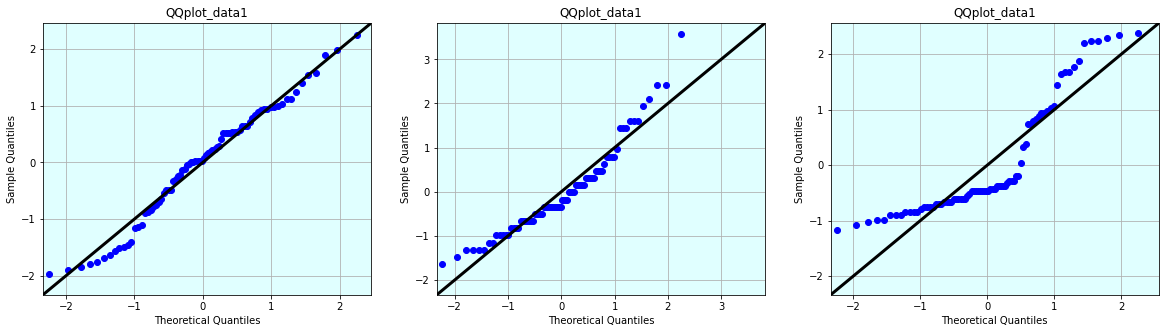

In [6]:

fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([3,6,7]):
  Columna=df.columns[k]
  Datos=df[Columna].values
  obs_dist=Datos.astype('double')

  ### Kernel Density Estimation - KDE ###

  # Para calcular una función de densidad de probabilidad continua, podemos usar
  # la estimación de densidad kernel.

  # Inicializamos un estimador de densidad de kernel univariante utilizando
  # KDEUnivariate.

  kde = sm.nonparametric.KDEUnivariate(obs_dist)
  kde.fit() # Estimate the densities

  # Ploteamos el KDE usando los siguientes argumentos por default

  ax[j].plot(kde.support, kde.density, lw=3, label=Columna , color = 'blue', zorder=10)

  # Ploteamos el histrograma

  ax[j].hist(obs_dist, bins='auto', density=True , label='Histograma',zorder=5 , color = 'aqua', edgecolor='black', alpha=0.5)
  ax[j].legend(loc='best')
  ax[j].grid()
  ax[j].set_facecolor("lightgreen")
  
  
plt.show()


# Q-Q plot - Grafica de Cuantiles

fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([3,6,7]):
  Columna=df.columns[k]
  Datos=df[Columna].values

  sm.qqplot(df[Columna],fit=True, color = 'blue' , line="45", distargs=(4,), ax=ax[j])

  ax[j].grid() 
  ax[j].get_lines()[1].set_color("black")
  ax[j].get_lines()[1].set_linewidth("3")
  ax[j].set_title('QQplot_data1')
  ax[j].set_facecolor("lightcyan")
  
  
  
plt.show()
  
  


# **Datos - Variables Utilizadas**

### **Respiradores_ocupados**

### **Respiradores_covid_ocupados**

### **Total_camas_ocupadas_ucma**


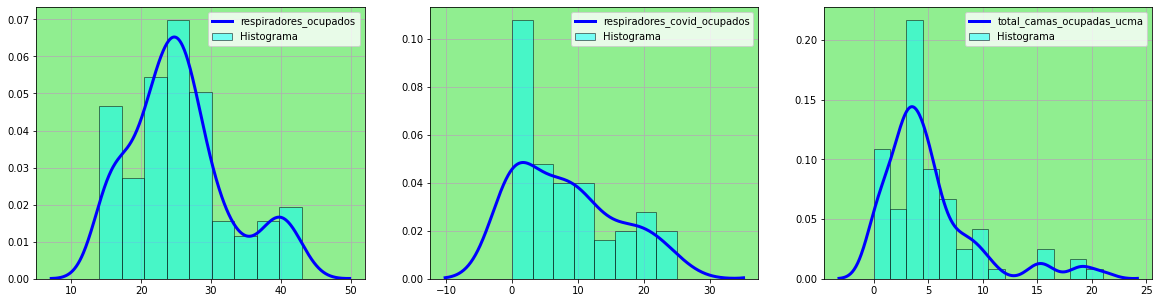

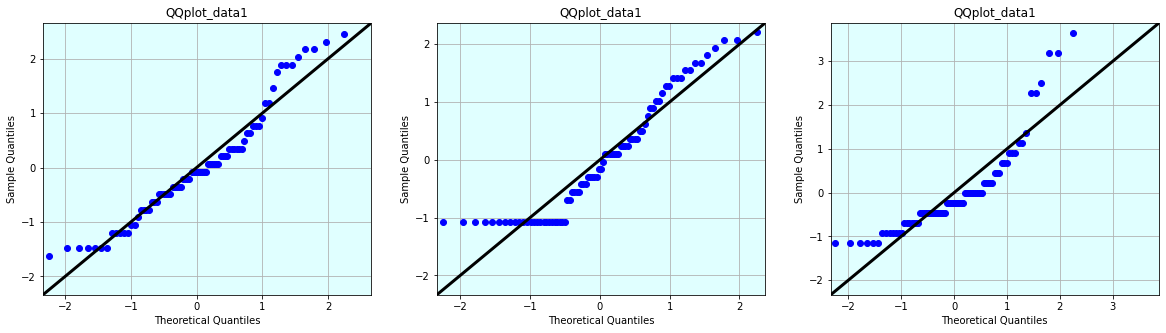

In [7]:

fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([12,14,16]):
  Columna=df.columns[k]
  Datos=df[Columna].values
  obs_dist=Datos.astype('double')

  ### Kernel Density Estimation - KDE ###

  # Para calcular una función de densidad de probabilidad continua, podemos usar
  # la estimación de densidad kernel.

  # Inicializamos un estimador de densidad de kernel univariante utilizando
  # KDEUnivariate.

  kde = sm.nonparametric.KDEUnivariate(obs_dist)
  kde.fit() # Estimate the densities

  # Ploteamos el KDE usando los siguientes argumentos por default

  ax[j].plot(kde.support, kde.density, lw=3, label=Columna , color = 'blue', zorder=10)

  # Ploteamos el histrograma

  ax[j].hist(obs_dist, bins='auto', density=True , label='Histograma',zorder=5 , color = 'aqua', edgecolor='black', alpha=0.5)
  ax[j].legend(loc='best')
  ax[j].grid()
  ax[j].set_facecolor("lightgreen")
  
  
plt.show()


# Q-Q plot - Grafica de Cuantiles

fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([12,14,16]):
  Columna=df.columns[k]
  Datos=df[Columna].values

  sm.qqplot(df[Columna],fit=True, color = 'blue' , line="45", distargs=(4,), ax=ax[j])
  

  ax[j].grid()
  ax[j].get_lines()[1].set_color("black")
  ax[j].get_lines()[1].set_linewidth("3")
  ax[j].set_title('QQplot_data1')
  ax[j].set_facecolor("lightcyan")
  
  
  
plt.show()
  

# **Conclusión**


**La gráfica de cuantiles (QQplot)** compara los cuantiles teóricos de una distribución con los cuantiles de muestra de un conjunto de datos.
Si el conjunto de datos se ha generado a partir de esa distribución, esperamos que este gráfico esté cerca de una línea de 45 grados, porque los cuantiles de muestra serán similares a los cuantiles teóricos. Si la muestra se ha generado a partir de una distribución diferente, no obtendremos una línea 45. 

**En este contexto**, podemos apreciar que las variables que siguen una distribucion normal en comparacion con las demas son las siguientes:


 - Camas_ocupadas_Hospitales.

 - Camas_sospechosos_Covid.

 - Respiradores_Ocupados.

# **Matriz de Correlación**

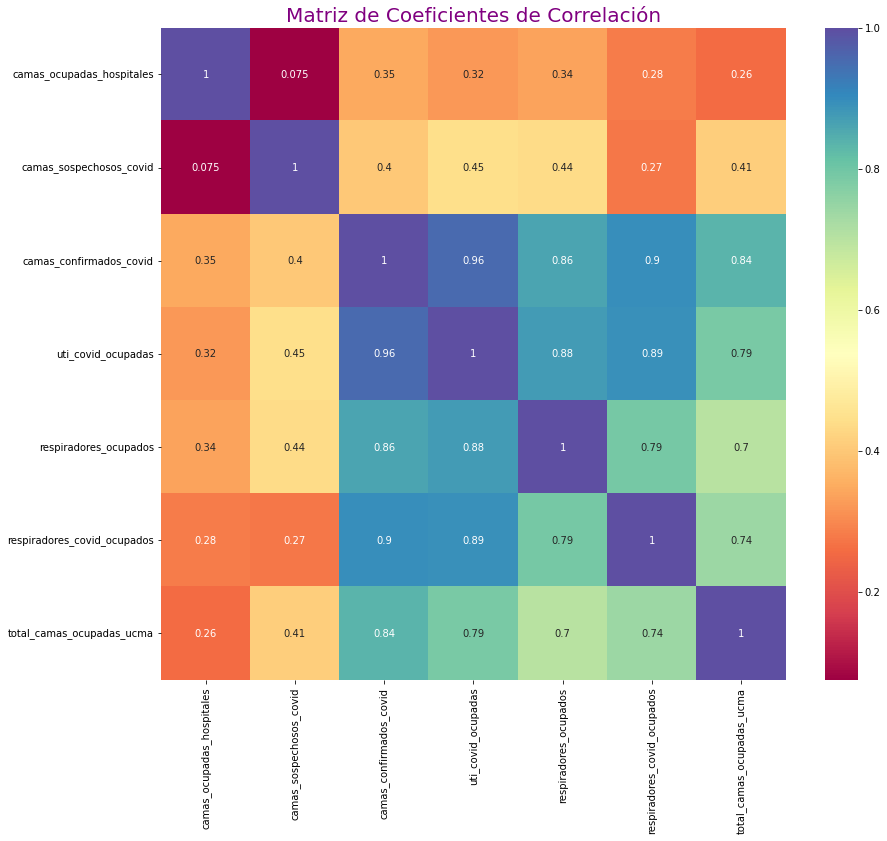

In [8]:

variables =["camas_ocupadas_hospitales","camas_sospechosos_covid","camas_confirmados_covid","uti_covid_ocupadas","respiradores_ocupados","respiradores_covid_ocupados","total_camas_ocupadas_ucma"]
corr = df[variables].corr()
f, ax = plt.subplots(figsize=(14, 12))

plt.title(label="Matriz de Coeficientes de Correlación", fontsize=20,color="purple")

upp_mat = np.triu(corr)
# sns.heatmap(corr, annot = True, mask = upp_mat , cmap = 'Spectral')
sns.heatmap(corr, annot = True, cmap = 'Spectral')



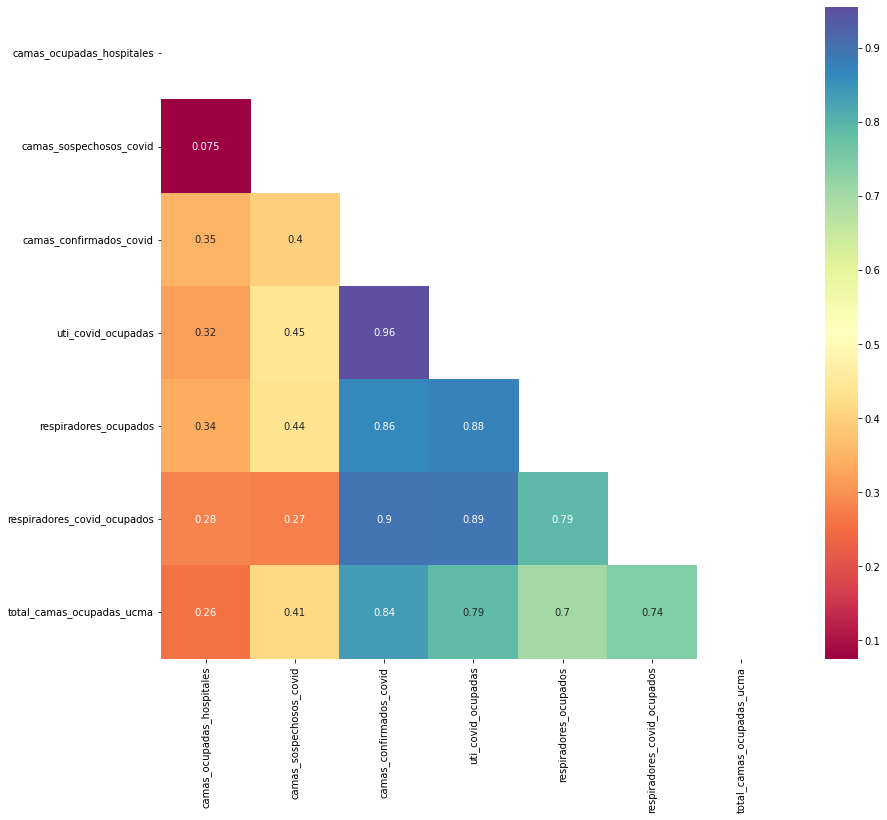

In [9]:
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr, annot = True, mask = upp_mat , cmap = 'Spectral')

# **Conclusiones**

De la matrix de correlacion, se puede observar que el aumento del numero de casos confirmados por Covid, provocó una mayor demanda de camas_confirmados_covid , asi como un alto numero respiradores_covid_ocupados . Coef = 0.9 (correlacion positiva)

Existe una correlacion fuerte   --> Valores comprendidos entre:

- [± 085  ----  ± 0.95]





# **Ejercicio I.I**

# **Dataset a utilizar / Casos_COVID Bahía Blanca**

In [10]:
file1 = ('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')

# **Información del Dataset  2**

In [11]:
df2 = pd.read_csv(file1)
df2
# df.head(10)

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


# **Obtenemos los Párametros Estadísticos**

In [12]:
df2.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


# **Datos - Variables Utilizadas**


### **Confirmados**

### **Recuperados**

### **decesos**

### **Sospechosos**

### **monitoreo_epidemiologico**


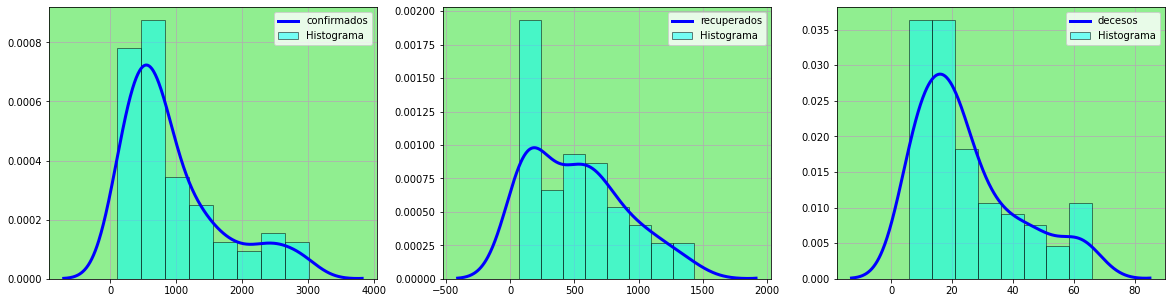

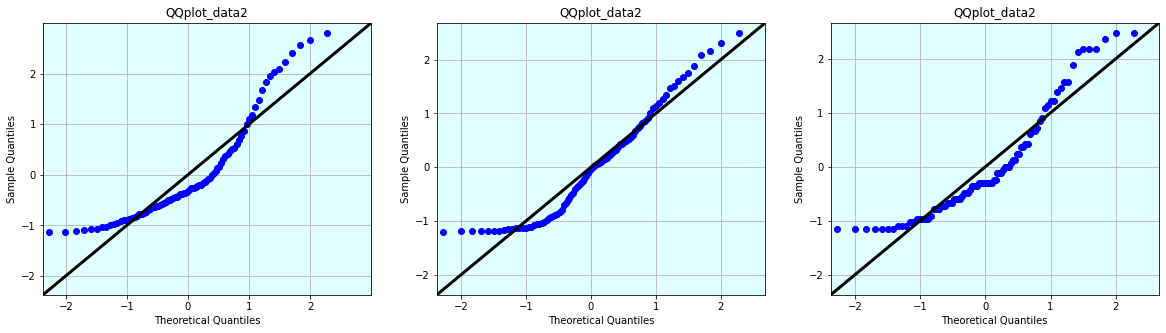

In [13]:
fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([1,3,4]):
  Columna=df2.columns[k]
  Datos=df2[Columna].values
  obs_dist=Datos.astype('double')

  ### Kernel Density Estimation - KDE ###

  # Para calcular una función de densidad de probabilidad continua, podemos usar
  # la estimación de densidad kernel.

  # Inicializamos un estimador de densidad de kernel univariante utilizando
  # KDEUnivariate.

  kde = sm.nonparametric.KDEUnivariate(obs_dist)
  kde.fit() # Estimate the densities

  # Ploteamos el KDE usando los siguientes argumentos por default

  ax[j].plot(kde.support, kde.density, lw=3, label=Columna , color = 'blue', zorder=10)

  # Ploteamos el histrograma

  ax[j].hist(obs_dist, bins='auto', density=True , label='Histograma',zorder=5 , color = 'aqua', edgecolor='black', alpha=0.5)
  ax[j].legend(loc='best')
  ax[j].grid()
  ax[j].set_facecolor("lightgreen")
  
  
plt.show()


# Q-Q plot - Grafica de Cuantiles

fig,ax = plt.subplots(1, 3,figsize=(20, 5))

for j,k in enumerate([1,3,4]):
  Columna=df2.columns[k]
  Datos=df2[Columna].values

  sm.qqplot(df2[Columna],fit=True, color = 'blue' , line="45", distargs=(4,), ax=ax[j])

  ax[j].grid() 
  ax[j].get_lines()[1].set_color("black")
  ax[j].get_lines()[1].set_linewidth("3")
  ax[j].set_title('QQplot_data2')
  ax[j].set_facecolor("lightcyan")
  
  
  
plt.show()

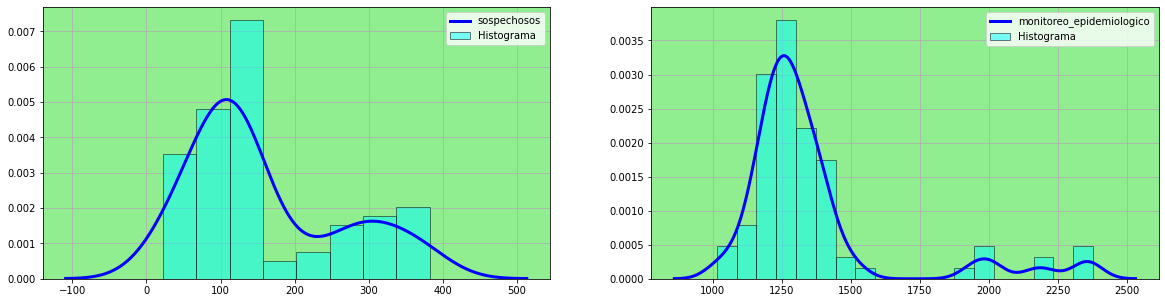

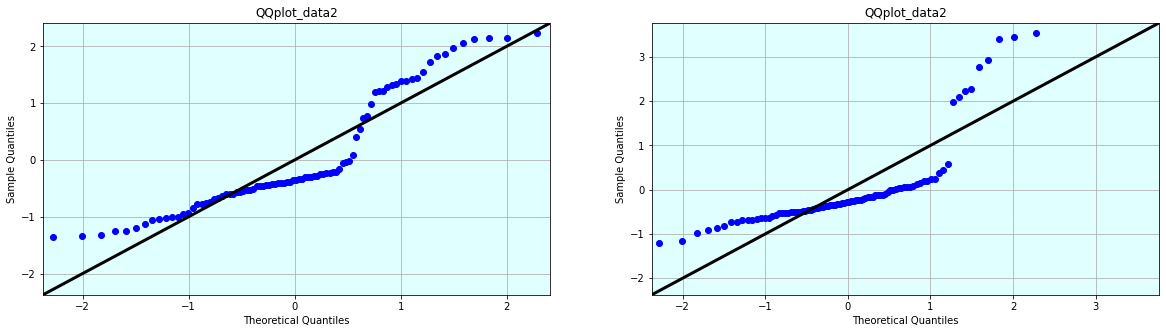

In [14]:
fig,ax = plt.subplots(1, 2,figsize=(20, 5))

for j,k in enumerate([6,8]):
  Columna=df2.columns[k]
  Datos=df2[Columna].values
  obs_dist=Datos.astype('double')

  ### Kernel Density Estimation - KDE ###

  # Para calcular una función de densidad de probabilidad continua, podemos usar
  # la estimación de densidad kernel.

  # Inicializamos un estimador de densidad de kernel univariante utilizando
  # KDEUnivariate.

  kde = sm.nonparametric.KDEUnivariate(obs_dist)
  kde.fit() # Estimate the densities

  # Ploteamos el KDE usando los siguientes argumentos por default

  ax[j].plot(kde.support, kde.density, lw=3, label=Columna , color = 'blue', zorder=10)

  # Ploteamos el histrograma

  ax[j].hist(obs_dist, bins='auto', density=True , label='Histograma',zorder=5 , color = 'aqua', edgecolor='black', alpha=0.5)
  ax[j].legend(loc='best')
  ax[j].grid()
  ax[j].set_facecolor("lightgreen")
  
  
plt.show()


# Q-Q plot - Grafica de Cuantiles

fig,ax = plt.subplots(1, 2,figsize=(20, 5))

for j,k in enumerate([6,8]):
  Columna=df2.columns[k]
  Datos=df2[Columna].values

  sm.qqplot(df2[Columna],fit=True, color = 'blue' , line="45", distargs=(4,), ax=ax[j])

  ax[j].grid() 
  ax[j].get_lines()[1].set_color("black")
  ax[j].get_lines()[1].set_linewidth("3")
  ax[j].set_title('QQplot_data2')
  ax[j].set_facecolor("lightcyan")
 
  
  
plt.show()

# **Conclusión**

En función de las  variables analizadas podemos observar que las mismas  no siguen una distribución normal, y presentan valores atipicos. Dichos valores atipicos puede eliminarse a través del Rango Intercuartil (IQR).

Dicho rango es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1) en un conjunto de datos. Mide la dispersión del 50% medio de los valores.

Se puede definir una observación como un valor atípico si es 1,5 veces el rango intercuartílico mayor que el tercer cuartil (Q3) o 1,5 veces el rango intercuartílico menor que el primer cuartil (Q1).




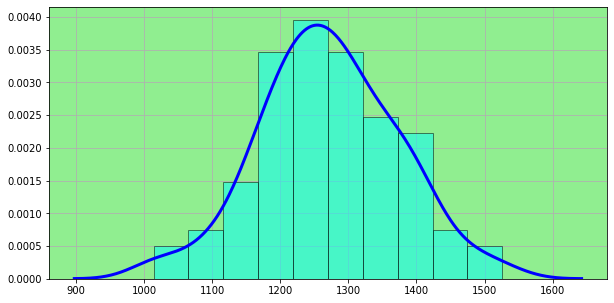

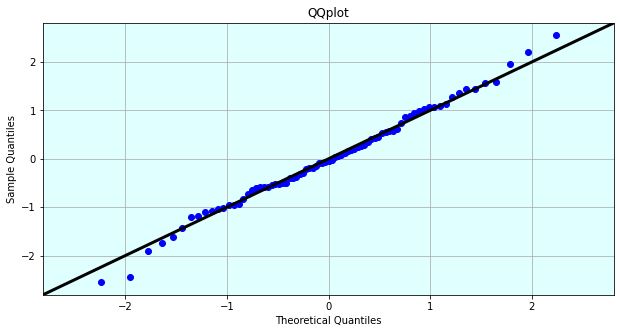

In [15]:
fig,ax = plt.subplots(1, 2,figsize=(10,5))
ax = plt.axes()

Datos=df2['monitoreo_epidemiologico']


## Rango Intercuartil (IQR)

Q1 = Datos.quantile (0.25)
Q3 = Datos.quantile (0.75)
IQR = Q3 - Q1
data_clean = (Datos.values > (Q1 - 1.5 * IQR)) & (Datos.values < (Q3 + 1.5 * IQR))


### Kernel Density Estimation - KDE ###


obs_dist=Datos[data_clean].astype('double')
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit() # Estimate the densities

# Ploteamos el KDE usando los siguientes argumentos por default

plt.plot(kde.support, kde.density, lw=3, label='monitoreo_epidemiologico' , color = 'blue', zorder=10)

# Ploteamos el histrograma

plt.hist(Datos[data_clean], bins='auto', density=True , label='Histograma',zorder=5 , color = 'aqua', edgecolor='black', alpha=0.5)
ax.grid('on')
ax.set_facecolor("lightgreen")


# Q-Q plot - Grafica de Cuantiles


fig,ax = plt.subplots(1,2,figsize=(22.5,5))

fig.delaxes(ax[1])

for j,k in enumerate([8]):

  sm.qqplot(Datos[data_clean],fit=True, color = 'blue' , line="45", distargs=(4,), ax=ax[j])
  
  ax[j].grid() 
  ax[j].get_lines()[1].set_color("black")
  ax[j].get_lines()[1].set_linewidth("3")
  ax[j].set_title('QQplot')
  ax[j].set_facecolor("lightcyan")


plt.show()


# **Matriz de Correlación**

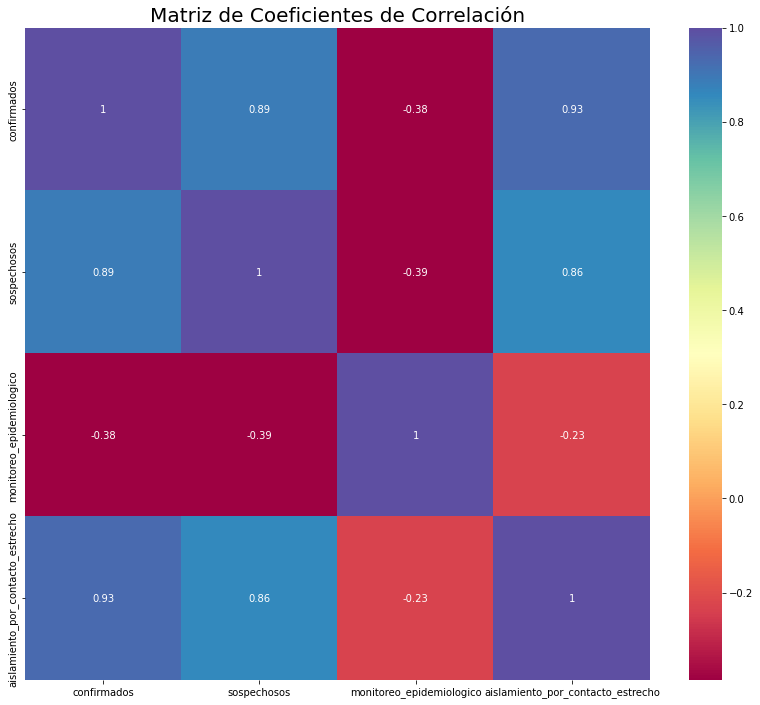

In [16]:
variables1 =["confirmados","sospechosos","monitoreo_epidemiologico","aislamiento_por_contacto_estrecho"]

corr = df2[variables1].corr()
f, ax = plt.subplots(figsize=(14, 12))

plt.title(label="Matriz de Coeficientes de Correlación", fontsize=20,color="black")

upp_mat = np.triu(corr)

# sns.heatmap(corr, annot = True, mask = upp_mat , cmap = 'Spectral')
sns.heatmap(corr, annot = True, cmap = 'Spectral')



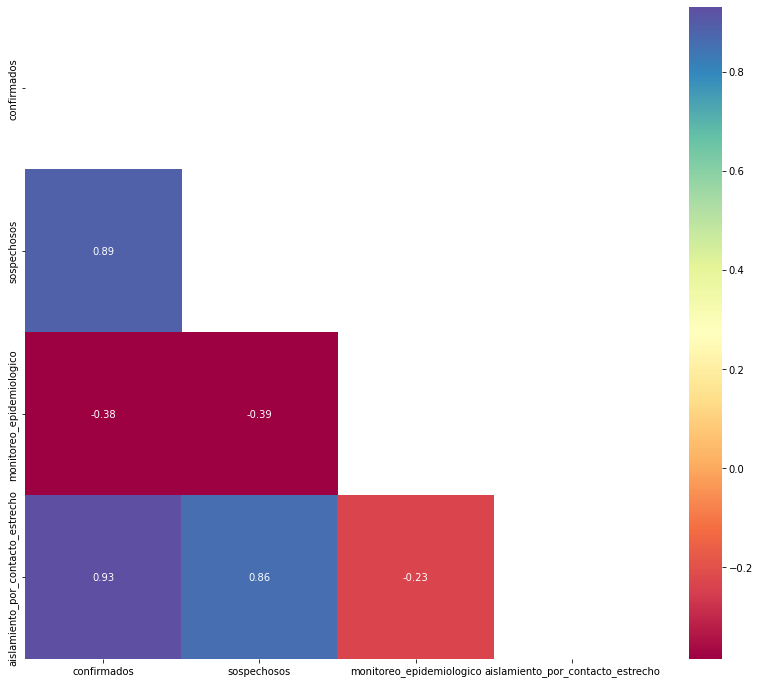

In [17]:
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr, annot = True, mask = upp_mat , cmap = 'Spectral')

# **Comentario** 

#### Si analizamos la matriz de correlacion , podemos apreciar una incongruencia dado que la variable = monitoreo epidemiologico deberia tener una correlacion positiva con los casos que han sido confirmados, pues con un incremento en el numero de testeos tambien se produce un aumento de la probabilidad de encontrar casos positivos.






#**Ejercicio II**

# **Generar un dataset similar al de la pág. 12 de la Clase II (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).**

<Figure size 720x432 with 0 Axes>

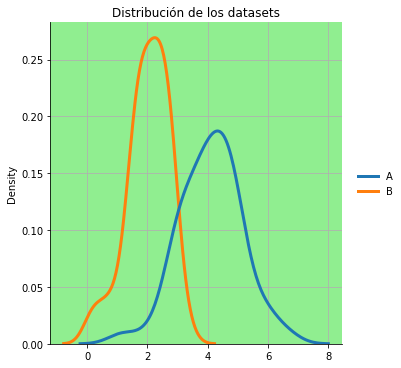

In [41]:


N = 50

clase_A = np.random.normal(4, 1, 50)

clase_B = np.random.normal(2, 0.7, 50)



df = pd.DataFrame({'A':clase_A ,'B': clase_B})

fig = plt.figure()


ax.grid()

fg = sns.displot(df,kind="kde",linewidth=3, rug=False)


ax = fg.ax
ax.grid()
ax.set_title("Distribución de los datasets")
ax.set_facecolor("lightgreen")

fig.show()



#**Valores Pertenecientes a las Clases**

In [42]:
def df_flatten_sort(df, N):
  
    serieA = df['A']
    serieB = df['B']

    nombresA = np.full(N, 'A')
    nombresB = np.full(N, 'B')

    dataset = np.append(nombresA, nombresB)
    valores = np.append(serieA, serieB)

    df_flatten = pd.DataFrame({'valores': valores, 'dataset': dataset})
    df_sort = df_flatten.sort_values(by="valores", ascending=False)

    return df_sort



In [43]:
df_sort = df_flatten_sort(df, N)

df_sort

,valores,dataset
38,6.602159,A
33,5.923912,A
30,5.870689,A
45,5.736075,A
1,5.135135,A
...,...,...
74,1.066566,B
81,0.762761,B
92,0.672094,B
83,0.232140,B


# **Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).**

# **Curva ROC**

In [44]:
def roc_curve_values(classes, class_true, N):

    roc = []
    t = []

    x,y = 0,0
    roc.append(y)
    t.append(x)

    for class_name in classes:
        if class_name == class_true:
            y+=1
        else:
            x+=1
        roc.append(y)
        t.append(x)

    t = np.array(t)
    roc = np.array(roc)

    return t/t.max(), roc/roc.max()




def print_roc(t, roc, class_true, punto = None):
    
    plt.figure(figsize=(6.5, 6.5), dpi=80)
    # plt.plot(t, roc, color=sns.color_palette()[1],label=f'Curva ROC - True: {class_true}')
    plt.plot(t, roc,color = 'green', linewidth=3,label=f'Curva ROC - True: {class_true}')
    # plt.plot([0, 1], [0, 1], color=sns.color_palette()[0],linestyle='--', label="Recta identidad")
    plt.plot([0, 1], [0, 1], color= 'black',linestyle='--', label="Recta identidad")


    if not punto is None:
        plt.plot(punto[0], punto[1], '-o', color = 'orange')

    plt.xlabel('False Positive Rate',fontweight='bold',fontsize = 12)
    plt.ylabel('True Positive Rate',fontweight='bold',fontsize = 12)
    plt.title('Receiver Operating Characteristic Curve',fontweight='bold',fontsize = 13)
    plt.legend(fontsize=10)

    ax = plt.axes()
    ax.set_facecolor("lightcyan")
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


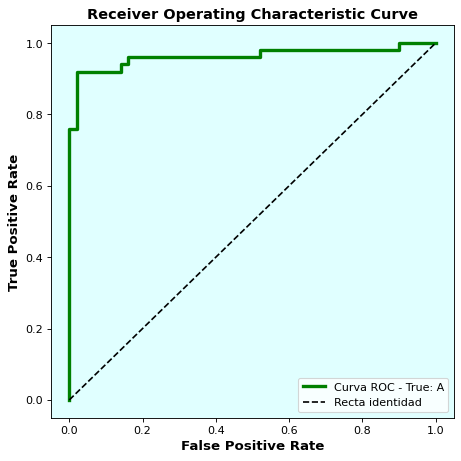

In [45]:
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
print_roc(t,roc,'A')

# **Encontrar el mejor valor de umbral**



El mejor método posible de predicción se situaría en un punto en la esquina superior izquierda, o coordenada (0,1) del espacio ROC, representando un 100% de sensibilidad (ningún falso negativo) y un 100% también de especificidad (ningún falso positivo). 

Es decir, tenga la mayor cantidad de verdaderos positivos predichos. A este punto (0,1) también se le llama una clasificación perfecta. 
Para este caso se considerará la clase A como True para la evaluación en el espacio ROC. Se buscará encontrar el umbral que genere la menor distancia a la esquina superior izquierda. 
.

Punto mas cercano (FPR_optimo, TPR_optimo):  0.02 0.92
Umbral óptimo:  2.9204621994749416


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


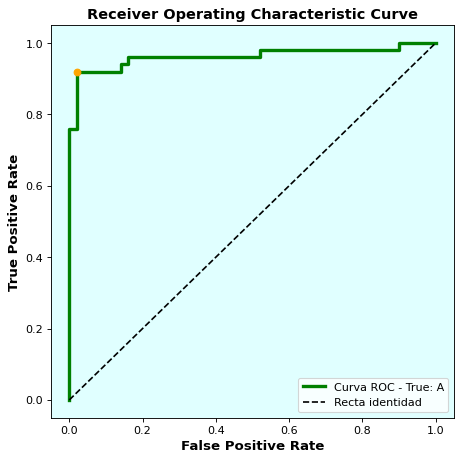

In [46]:
def buscar_umbral_optimo(valores, t, roc):
   
    dist_min = np.inf
    i_min = 0
    par_min = (0,0)
    for i in range(t.shape[0]):
        par = (t[i],roc[i])
        dist = np.sqrt(par[0]**2 + (par[1]-1)**2)
        if dist<dist_min:
            dist_min = dist
            i_min = i
            par_min = par

    umbral = (valores[i_min] + valores[i_min-1])/2

    print("Punto mas cercano (FPR_optimo, TPR_optimo): ", t[i_min],roc[i_min])
    print("Umbral óptimo: ",umbral)

    print_roc(t,roc,'A',par_min)

    return umbral

umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

# **Gráfica Umbral - Datos Procesados**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 720x432 with 0 Axes>

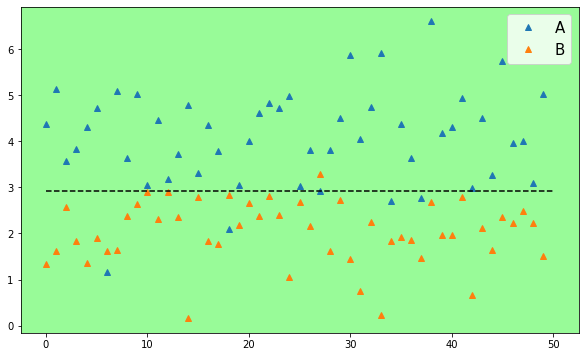

In [47]:
plt.figure(figsize=(10, 6)) 

df.plot(style='^',fontsize = 10)
plt.plot([0,N],[umbral,umbral], '--', color='black')

ax = plt.axes()
ax.set_facecolor("palegreen")
plt.rcParams['figure.figsize'] = [10,6]
plt.legend(prop={'size':15})
plt.show()


# **Predicción a traves de un DataFrame (df_pred) con los datos clasificados usando el umbral**

In [48]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]

pd.DataFrame({'valores': df_sort["valores"].values, 'sort': df_sort["dataset"].values, 'pred': df_pred["dataset"].values}) 

,valores,sort,pred
0,6.602159,A,A
1,5.923912,A,A
2,5.870689,A,A
3,5.736075,A,A
4,5.135135,A,A
...,...,...,...
95,1.066566,B,B
96,0.762761,B,B
97,0.672094,B,B
98,0.232140,B,B


# **Parámetros de  Calidad**




Parámetros de calidad: 

TPR: 0.9200	FNR: 0.0800
FPR: 0.0200	TNR: 0.9800

PPV: 0.9787	FOR: 0.0755
FDR: 0.0213	NPV: 0.9245

Accuracy: 0.9500
F_measure: 0.9485
Indice de Jaccard: 0.9020



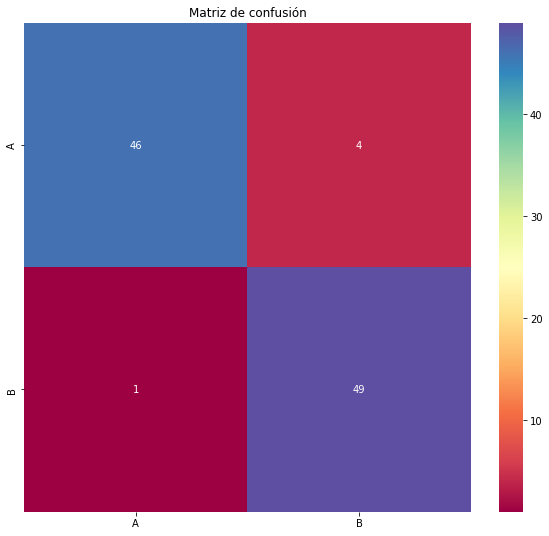

In [49]:
from sklearn.metrics import confusion_matrix

def print_params(real, pred):
 
    mc = confusion_matrix(real, pred)
    tp, fn, fp, tn = mc.flatten()
    
    tpr = tp / (tp + fn) # de los positivos cuantos se clasificaron positivos (correctos)   -> Sensibilidad o Recall
    tnr = tn / (tn + fp) # de los negativos cuantos se clasificaron negativos (correctos)   -> Especificidad
    fnr = fn / (tp + fn) # de los positivos cuantos se clasificaron negativos (incorrectos) -> 1 - Especificidad
    fpr = fp / (tn + fp) # de los negativos cuantos se clasificaron positivos (incorrectos) -> Fall-out

    ppv = tp / (tp + fp) # de los predichos positivos cuantos realmente eran positivos -> Presicion
    npv = tn / (tn + fn) # de los predichos negativos cuantos realmente eran negativos -> Negative Predictive Value
    fort= fn / (tn + fn) # de los predichos negativos cuantos eran positivos -> False omission Rate
    fdr = fp / (tp + fp) # de los predichos positivos cuantos eran negativos -> False Discovery Rate


    accuracy = (tp + tn)/(tp+fn+tn+fp) # del total cuantos se clasificaron correctamente
    f_measure = (2*ppv*tpr)/(ppv+tpr) # Indica que tan preciso y robusto es el clasificador
    idx_jacard = tp/(tp+fp+fn) # ignorando los tn, proporcion de tp frente a positivos reales y predichos

    report = f"Parámetros de calidad: \n\n"
    report += f"TPR: {tpr:.4f}\tFNR: {fnr:.4f}\nFPR: {fpr:.4f}\tTNR: {tnr:.4f}\n\n"
    report += f"PPV: {ppv:.4f}\tFOR: {fort:.4f}\nFDR: {fdr:.4f}\tNPV: {npv:.4f}\n\n"
    report += f"Accuracy: {accuracy:.4f}\nF_measure: {f_measure:.4f}\nIndice de Jaccard: {idx_jacard:.4f}\n"
    print(report)

    df_cm = pd.DataFrame(mc, index = [i for i in "AB"], columns = [i for i in "AB"])
    plt.figure(figsize = (10,9))
    sns.heatmap(df_cm, annot=True,cmap = 'Spectral')
    plt.title("Matriz de confusión")
    plt.show()

print_params(df_sort['dataset'], df_pred['dataset'])

# **Comentario**

Podemos apreciar que se puede clasificar con el 95% de accuracy los ejemplos utilizando el umbral óptimo. Presenta un buen poder de predicción

A su vez se observa un valor de  F_measure alto, esto se traduce en que existe un buen equilibrio  entre la presición y la sensibilidad.

# **Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).** 




# **Acercando la media de los Grupos**

<Figure size 720x432 with 0 Axes>

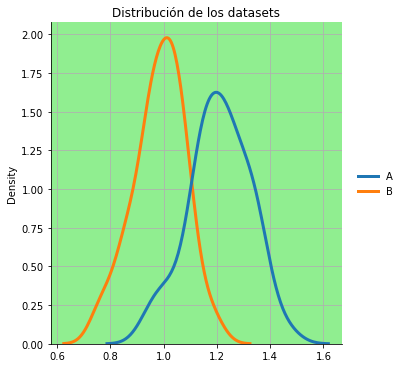

In [50]:
# N = 50
clase_A = np.random.normal(1.2, 0.1, 50)
clase_B = np.random.normal(1, 0.1, 50)


df = pd.DataFrame({'A':clase_A ,'B': clase_B})
fig = plt.figure()
ax.grid()

fg = sns.displot(df,kind="kde",linewidth=3, rug=False)


ax = fg.ax
ax.grid()
ax.set_title("Distribución de los datasets")
ax.set_facecolor("lightgreen")

fig.show()


# **Comentario**

#### En este caso, a partir de las distribuciones de los datos asignados resultara mas dificil poder diferenciar entre ambas clases.

####Sin embargo, a partir de la curva ROC se puede hallar el umbral optimo en el espacio ROC. ( Menor rate de fallos de "A" y mayor rate de aciertos "B").









Punto mas cercano (FPR_optimo, TPR_optimo):  0.06 0.88
Umbral óptimo:  1.106553592953884


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


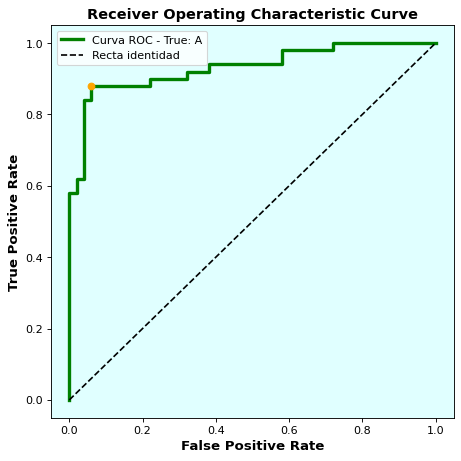

In [51]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

# **Datos Procesados**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


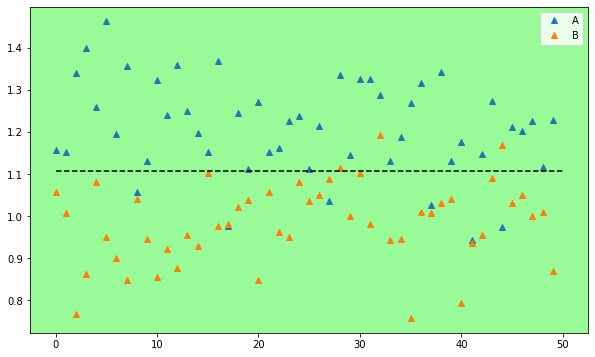

In [52]:
df.plot(style='^',fontsize = 10)
plt.plot([0,N],[umbral,umbral], '--', color='black')

ax = plt.axes()
ax.set_facecolor("palegreen")
plt.rcParams['figure.figsize'] = [10, 6]

  
# plt.legend(prop={'size':15})

plt.show()

Parámetros de calidad: 

TPR: 0.8800	FNR: 0.1200
FPR: 0.0600	TNR: 0.9400

PPV: 0.9362	FOR: 0.1132
FDR: 0.0638	NPV: 0.8868

Accuracy: 0.9100
F_measure: 0.9072
Indice de Jaccard: 0.8302



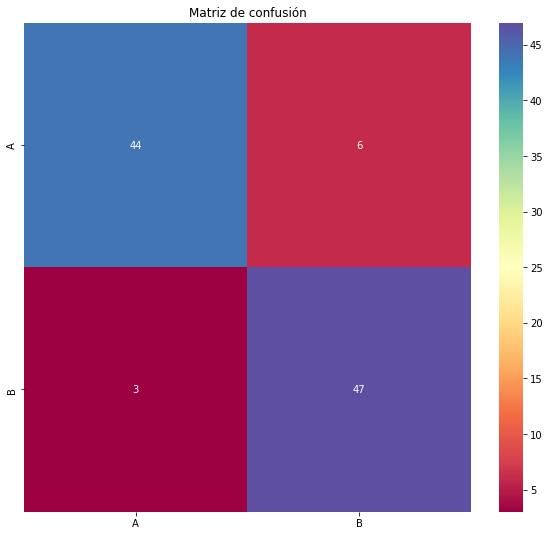

In [53]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

# **Comentario**

En funcion del umbral optimo establecido es posible clasificar correctamente la mayor cantidad de elementos y de manera similar para ambas clases. 

Al tener la medias cercas y desvio estandar distinto, se clasifican bien y mal de manera proporcional en ambos conjuntos.


# **Superposición de medias pero con distinto desvío estandar**


<Figure size 720x432 with 0 Axes>

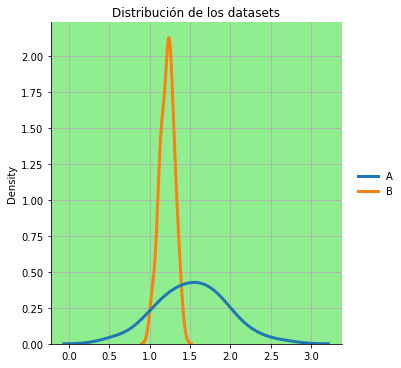

In [66]:
# N = 50
clase_A = np.random.normal(1.5, 0.4, 50)
clase_B = np.random.normal(1.2, 0.1, 50)


df = pd.DataFrame({'A':clase_A ,'B': clase_B})
fig = plt.figure()
ax.grid()

fg = sns.displot(df,kind="kde",linewidth=3, rug=False)


ax = fg.ax
ax.grid()
ax.set_title("Distribución de los datasets")
ax.set_facecolor("lightgreen")

fig.show()

Punto mas cercano (FPR_optimo, TPR_optimo):  0.12 0.7
Umbral óptimo:  1.3199173533314283


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


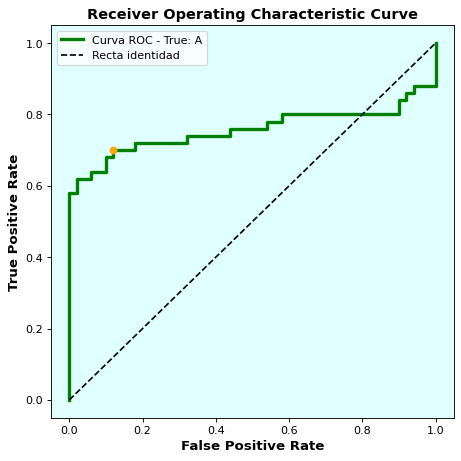

In [67]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


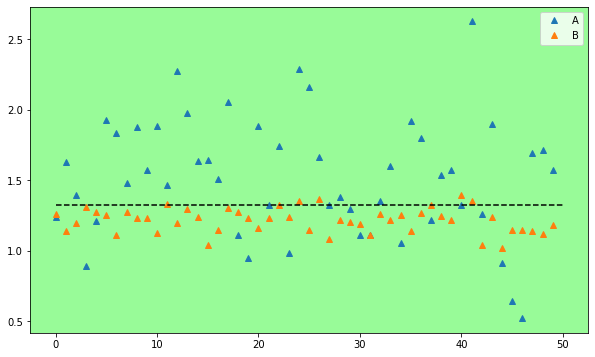

In [68]:
df.plot(style='^',fontsize = 10)
plt.plot([0,N],[umbral,umbral], '--', color='black')

ax = plt.axes()
ax.set_facecolor("palegreen")
plt.rcParams['figure.figsize'] = [10, 6]

  
# plt.legend(prop={'size':15})

plt.show()

Parámetros de calidad: 

TPR: 0.7000	FNR: 0.3000
FPR: 0.1200	TNR: 0.8800

PPV: 0.8537	FOR: 0.2542
FDR: 0.1463	NPV: 0.7458

Accuracy: 0.7900
F_measure: 0.7692
Indice de Jaccard: 0.6250



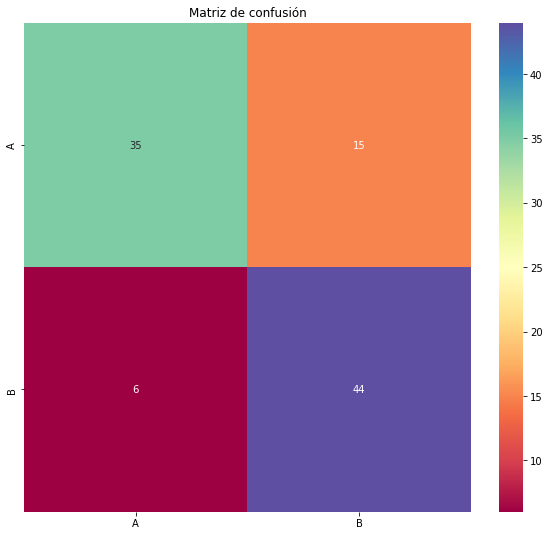

In [70]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

# **Comentario**

##### Se puede apreciar en funcion del umbral optimo, que todos los elementos de la clase 'B' son correctamente clasificados, sin embargo, no sucede lo mismo con clase 'A' ya que existen muchos valores que fueron clasificados como 'B'.


# **Misma media y Varianza - Distribución superpuesta en su totalidad**

<Figure size 720x432 with 0 Axes>

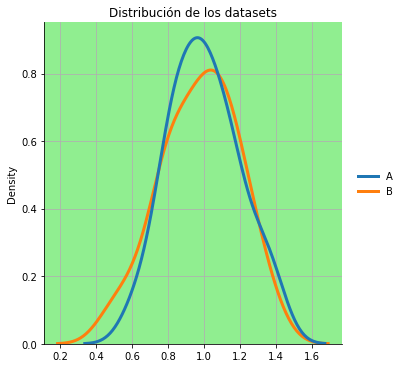

In [82]:
# N = 50
clase_A = np.random.normal(1, 0.2, 50)
clase_B = np.random.normal(1, 0.2, 50)


df = pd.DataFrame({'A':clase_A ,'B': clase_B})
fig = plt.figure()
ax.grid()

fg = sns.displot(df,kind="kde",linewidth=3, rug=False)


ax = fg.ax
ax.grid()
ax.set_title("Distribución de los datasets")
ax.set_facecolor("lightgreen")

fig.show()

Punto mas cercano (FPR_optimo, TPR_optimo):  0.46 0.5
Umbral óptimo:  0.9911614785196099


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


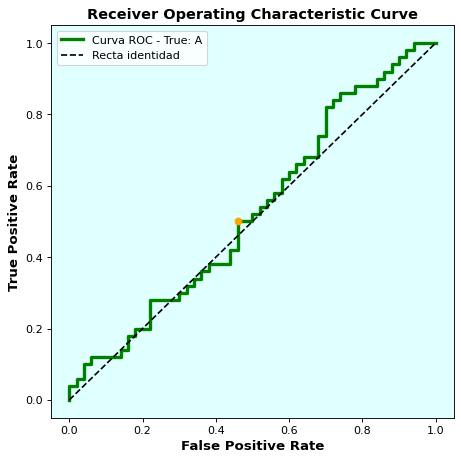

In [83]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


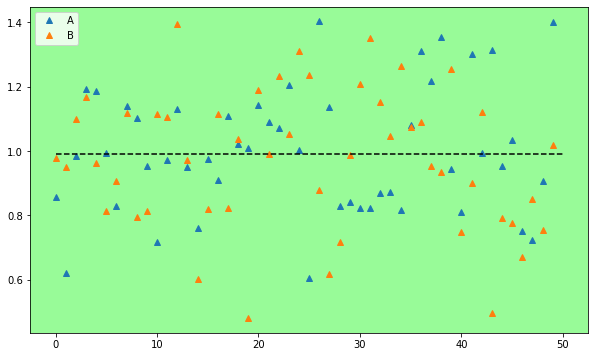

In [84]:
df.plot(style='^',fontsize = 10)
plt.plot([0,N],[umbral,umbral], '--', color='black')

ax = plt.axes()
ax.set_facecolor("palegreen")
plt.rcParams['figure.figsize'] = [10, 6]

  
# plt.legend(prop={'size':15})

plt.show()

Parámetros de calidad: 

TPR: 0.5000	FNR: 0.5000
FPR: 0.4600	TNR: 0.5400

PPV: 0.5208	FOR: 0.4808
FDR: 0.4792	NPV: 0.5192

Accuracy: 0.5200
F_measure: 0.5102
Indice de Jaccard: 0.3425



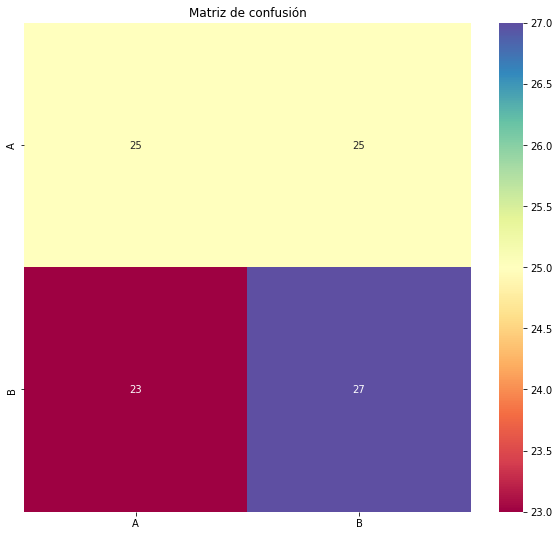

In [85]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

#**Comentario**

Podemos observar que el umbral no separa ambos conjuntos por la distribución de sus datos.  El punto(predicción) esta cerca de la línea de no discriminación, estamos en presencia de una clasificación aleatoria. 

(Un ejemplo típico de clasificación aleatoria sería decidir a partir de los resultados de lanzar una moneda al aire, a medida que el tamaño de la muestra aumenta, el punto de un clasificador aleatorio de ROC se desplazará hacia la posición (0.5, 0.5).
Se acierta y falla en proporciones similares. Por eso el accuracy es aproximadamente del 50%.

Por último, mencionar que, a medida que se superponen las dos distribuciones, disminuye el área de la curva ROC  es decir se produce un aumento de los casos de falsos positivos y negativos.

